In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

from PIL import Image
import urllib
import os

In [6]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [8]:
import requests
from PIL import Image
from io import BytesIO

def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    response = requests.get(f'{fotmob_url}{team_id:.0f}.png')
    club_icon = Image.open(BytesIO(response.content))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax


In [13]:
import requests
from PIL import Image
from io import BytesIO

def ax_logo_player(player_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    response = requests.get(f'{fotmob_url}{player_id:.0f}.png')
    club_icon = Image.open(BytesIO(response.content))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fe9b955da90>

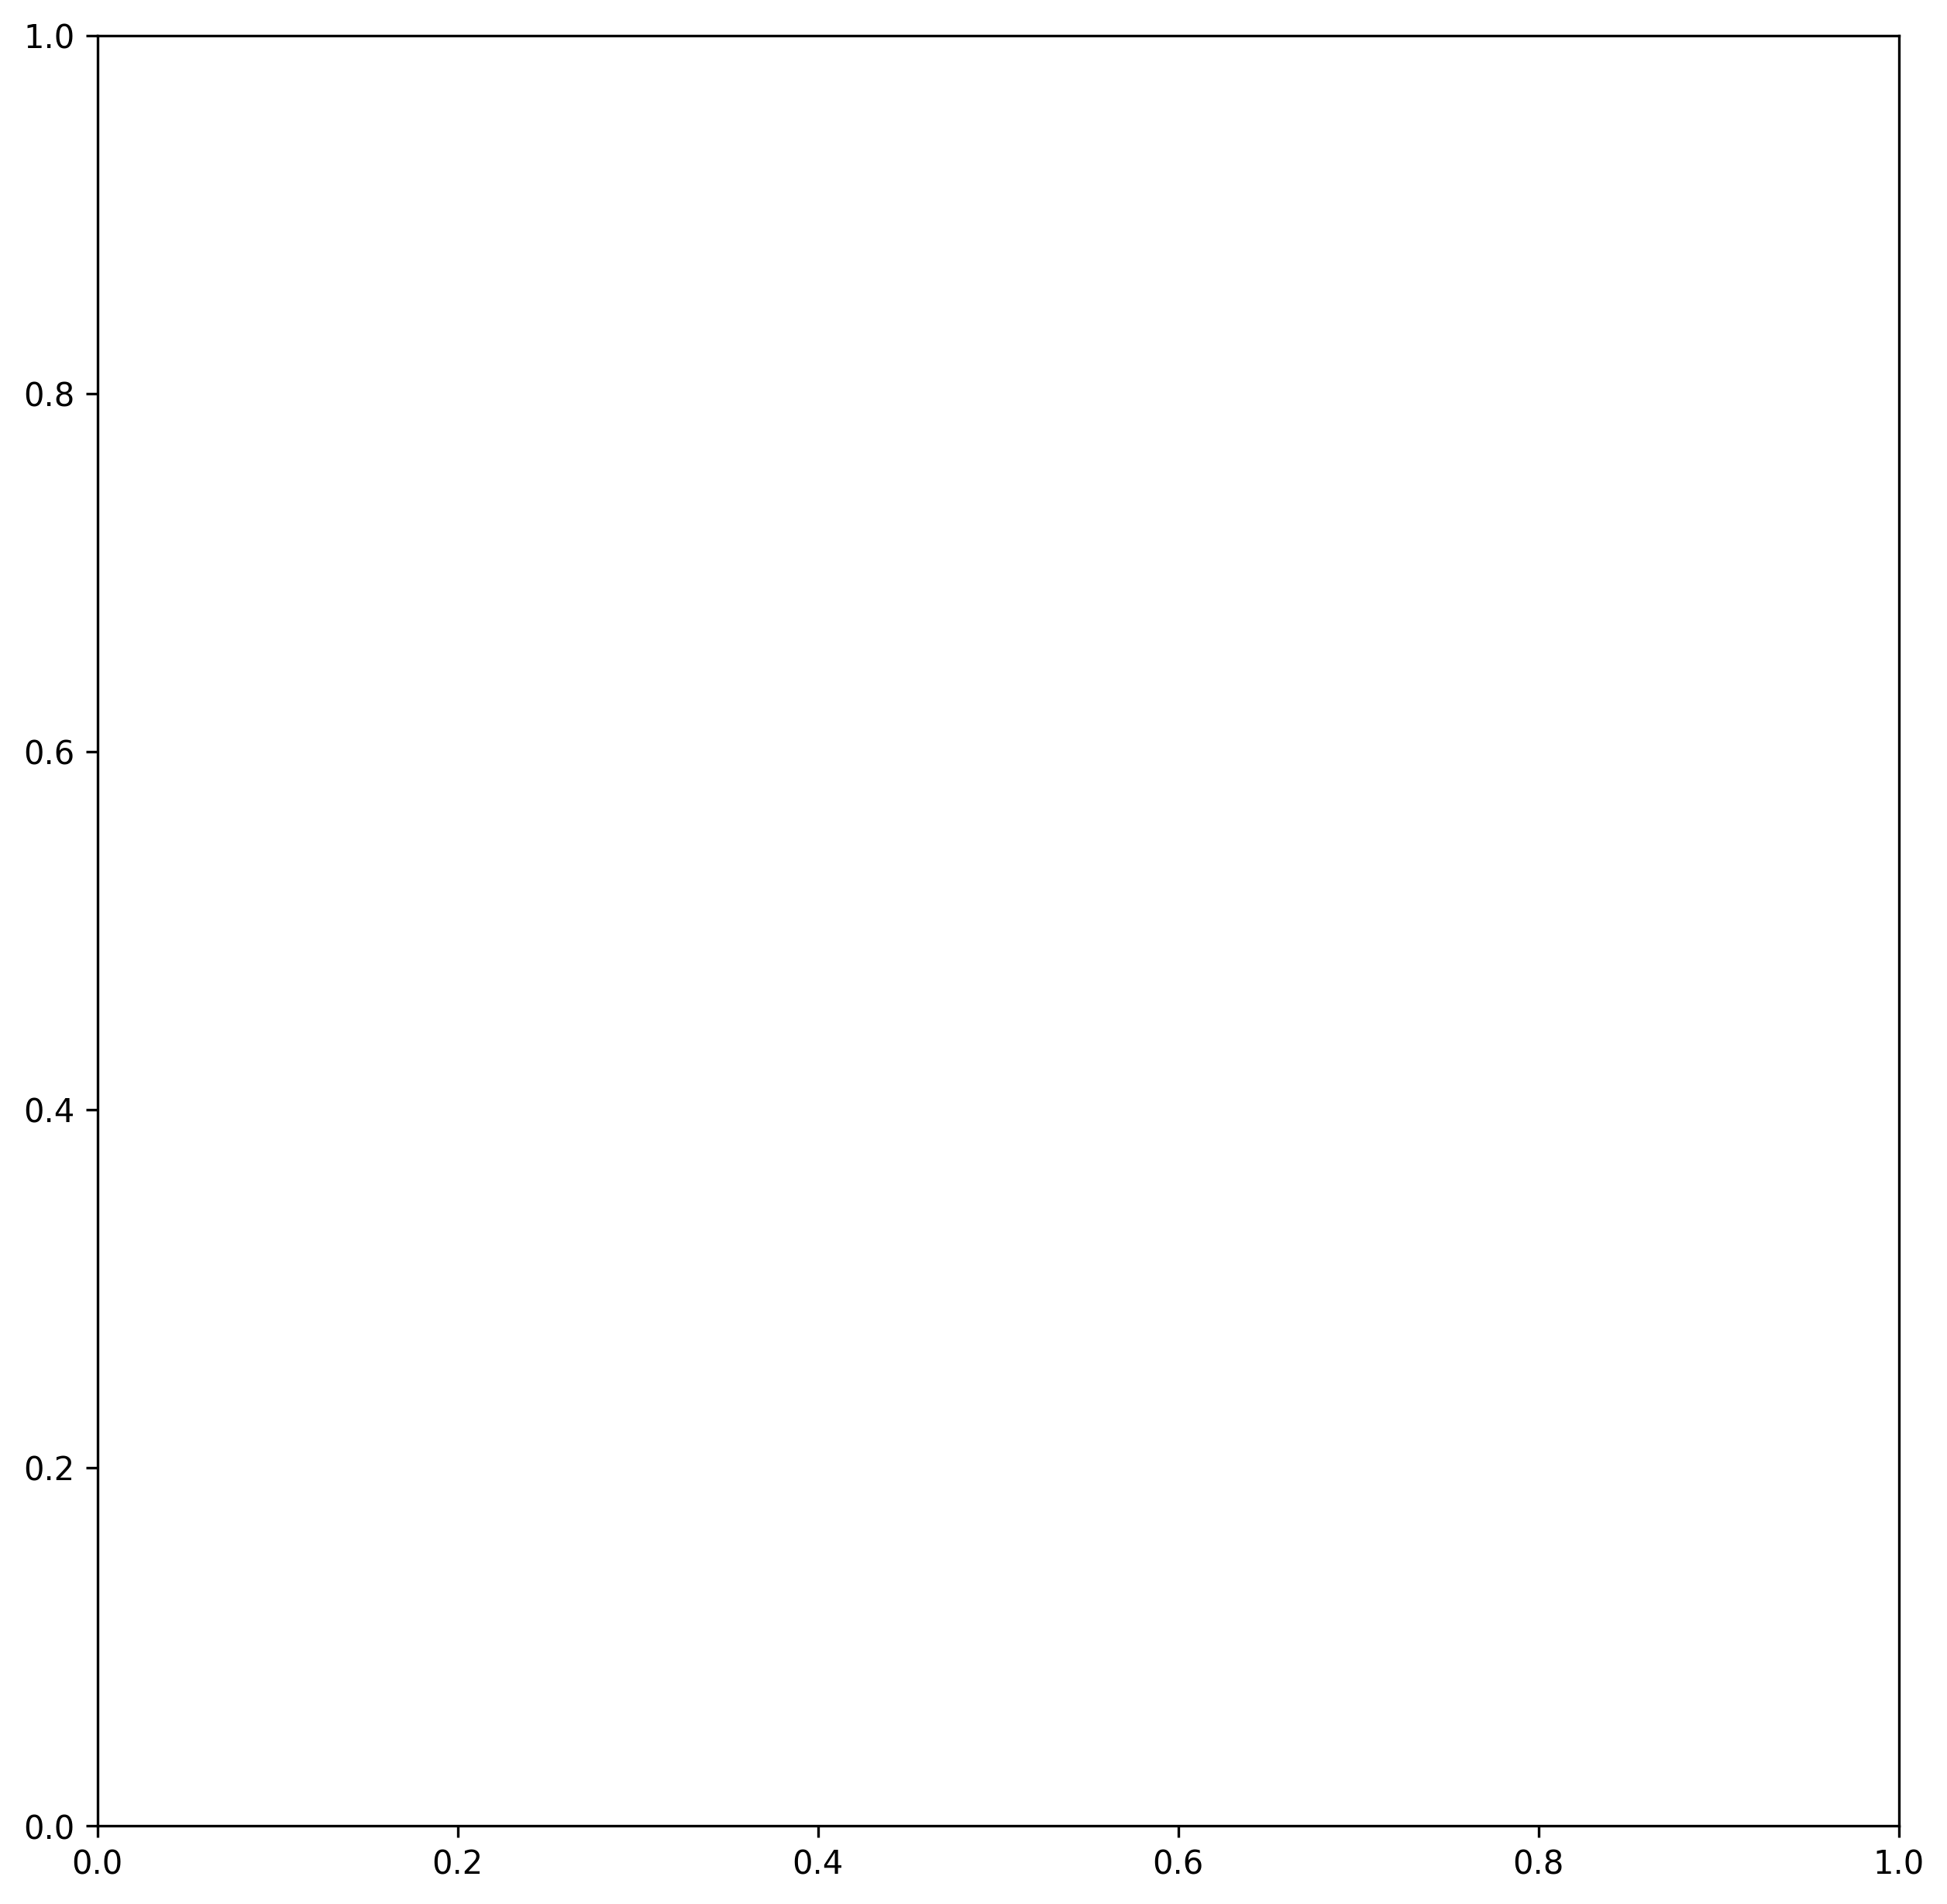

In [14]:
fig = plt.figure(figsize=(10,10), dpi=300)
ax = plt.subplot()

ax_logo_player(319784,ax)



<AxesSubplot: >

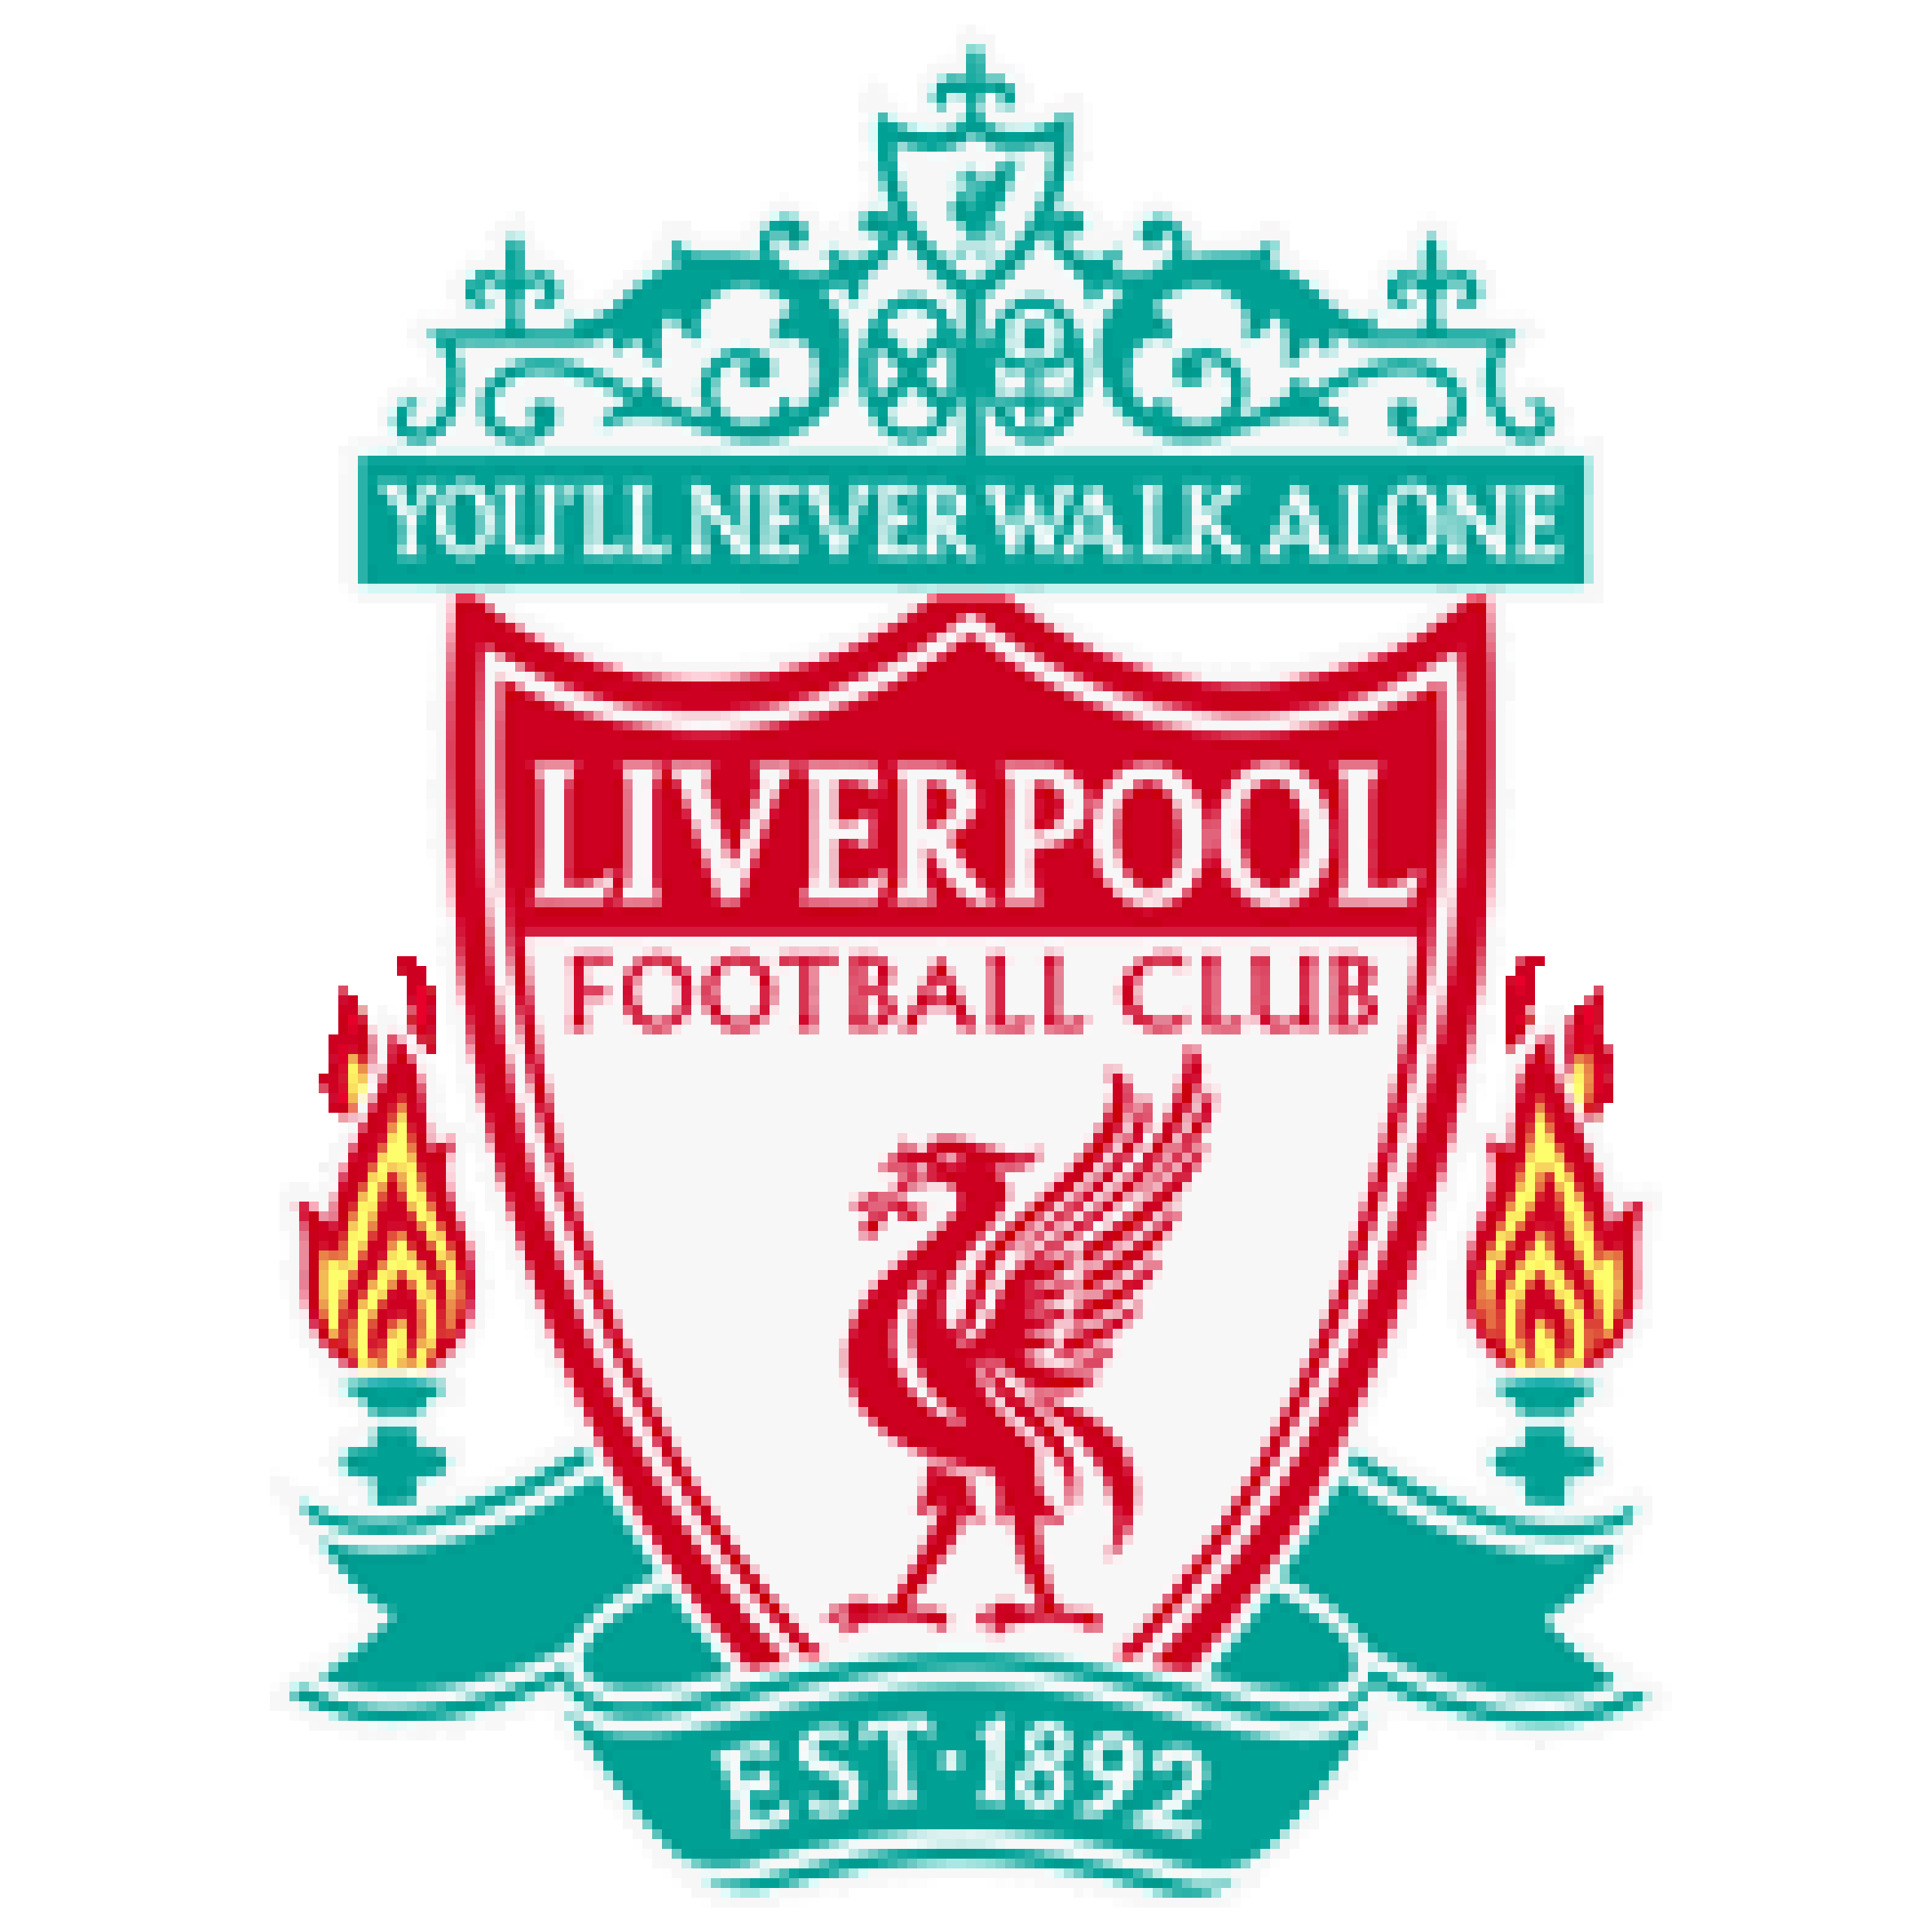

In [11]:

fig = plt.figure(figsize=(10,10), dpi=300)
ax = plt.subplot()

ax_logo(8650,ax)

<AxesSubplot: >

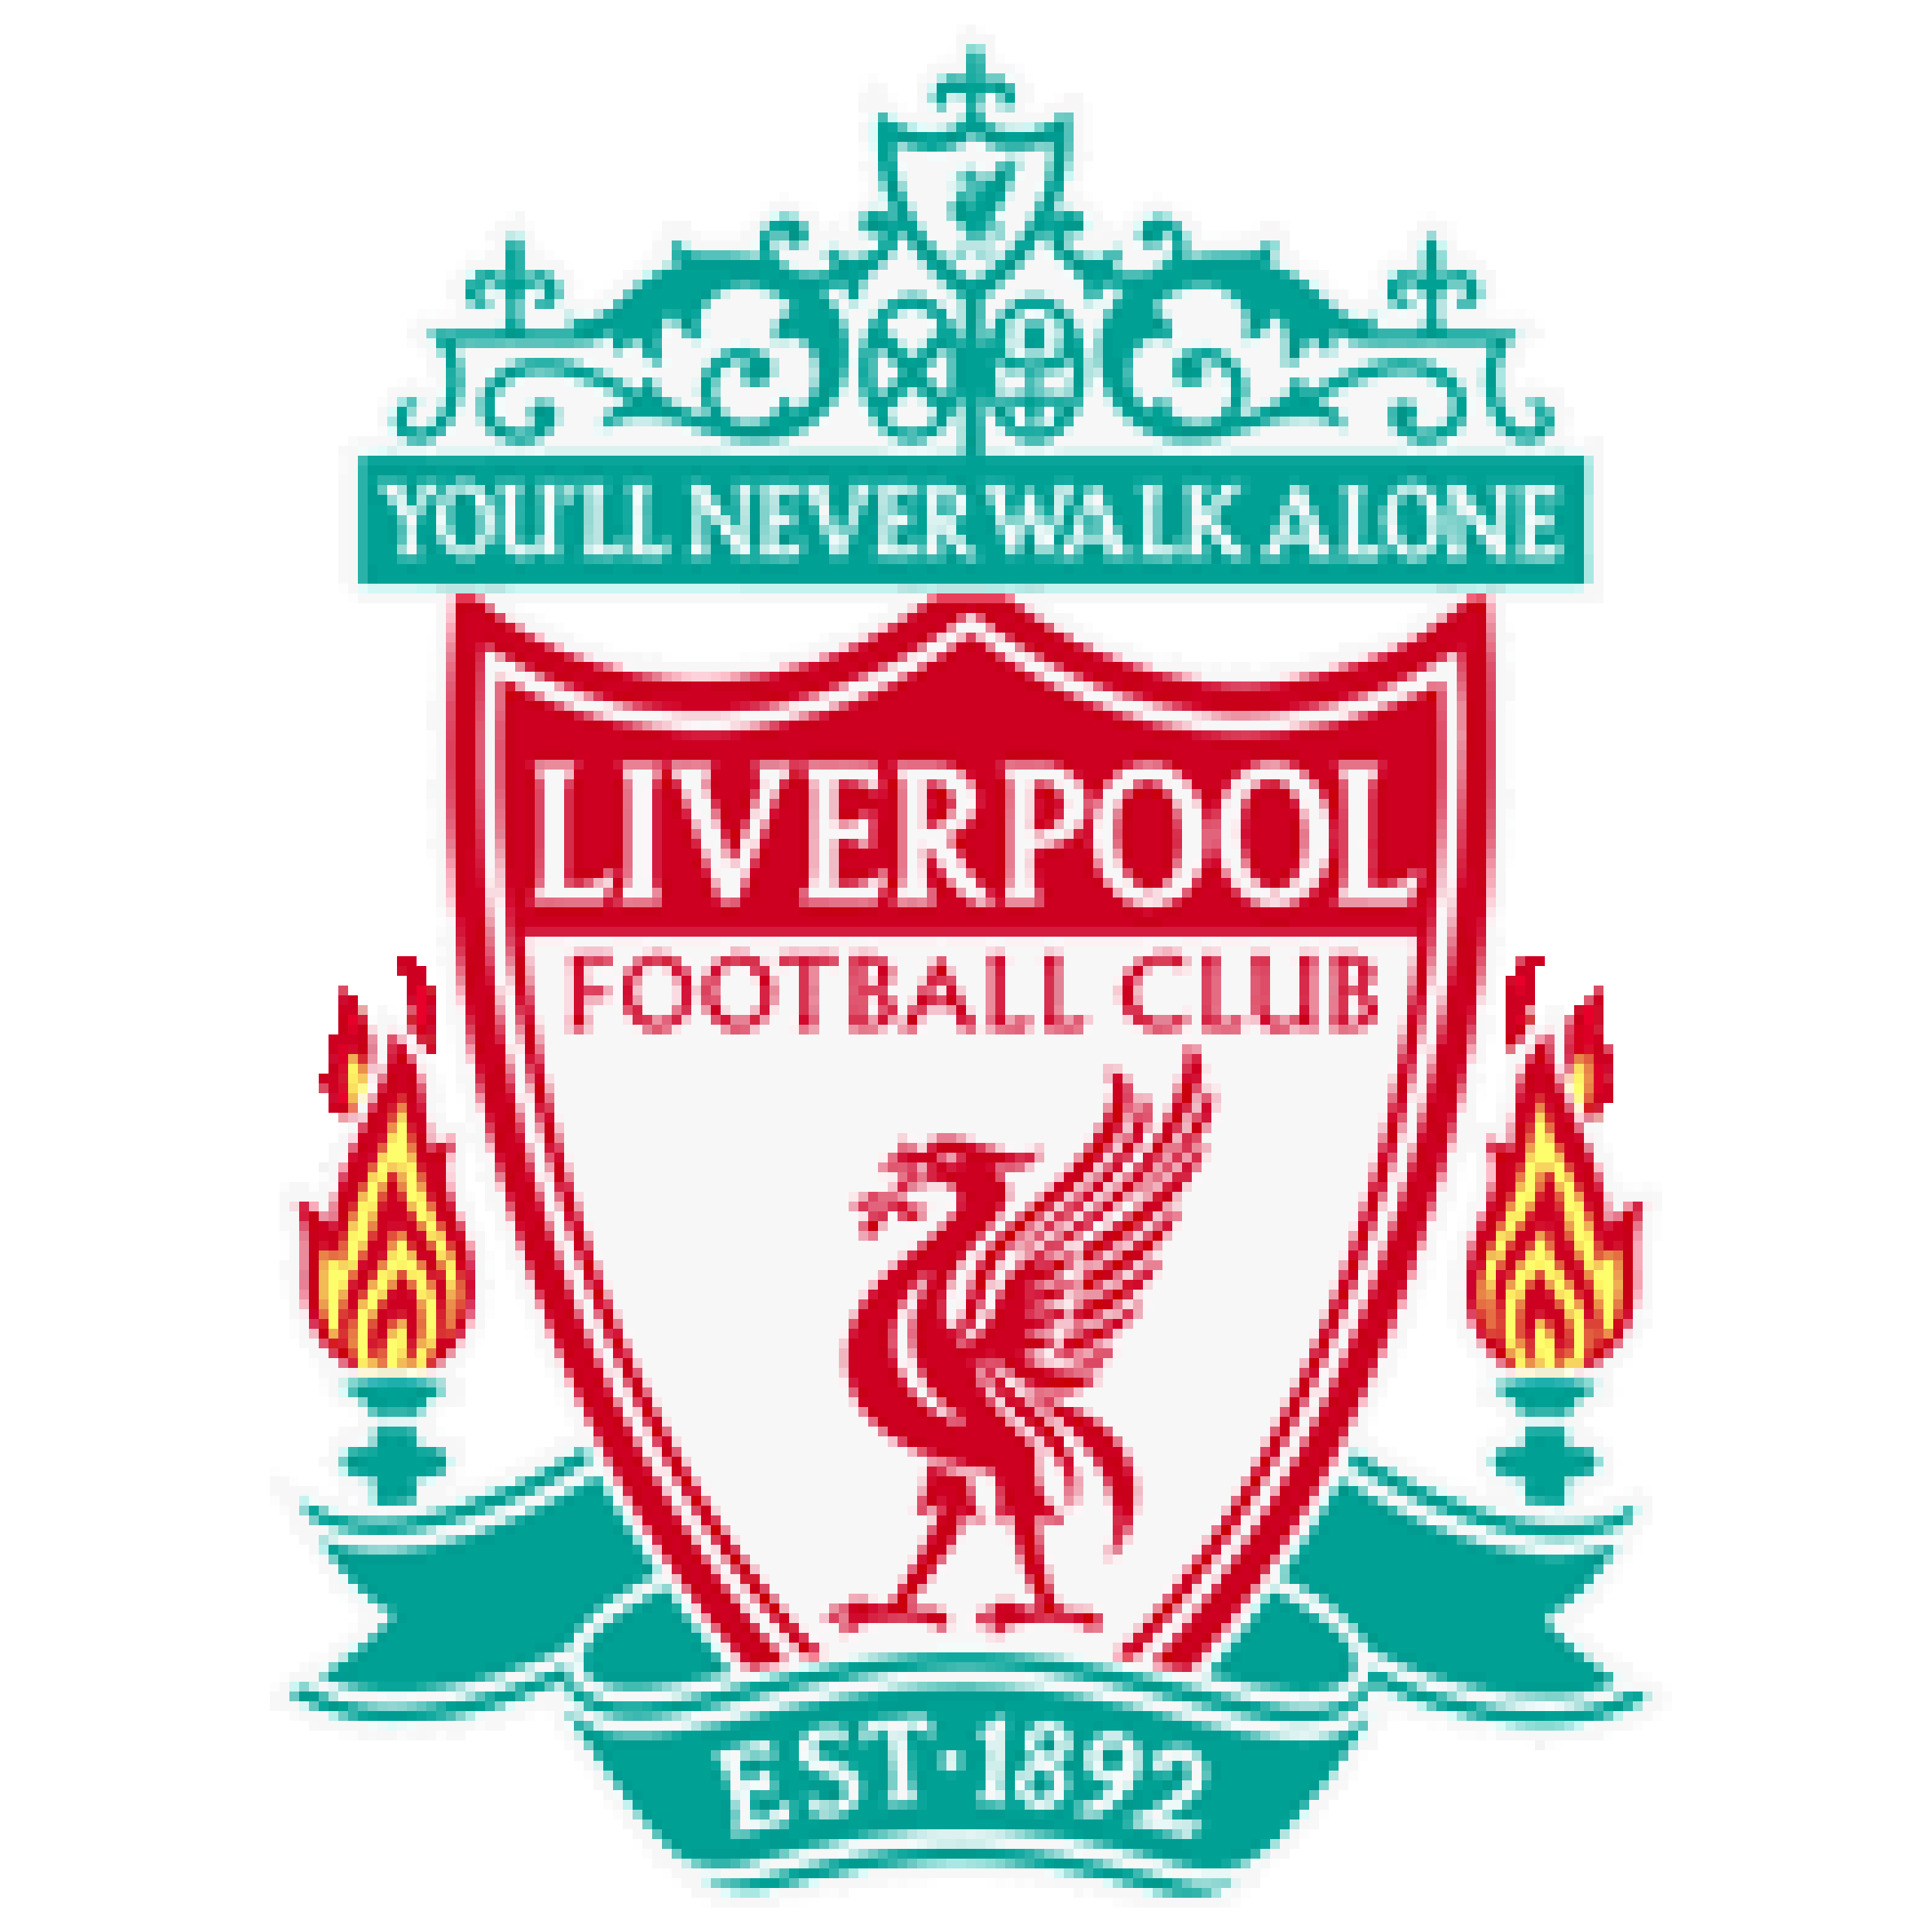

In [16]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def ax_logo(team_id, ax, size=100, x_pos=0, y_pos=0):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
        size (int): size of the image (in pixels)
        x_pos (int): x-coordinate of the bottom left corner of the image (in data coordinates)
        y_pos (int): y-coordinate of the bottom left corner of the image (in data coordinates)
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    response = requests.get(f'{fotmob_url}{team_id:.0f}.png')
    club_icon = Image.open(BytesIO(response.content))
    ax.imshow(club_icon, extent=[x_pos, x_pos+size, y_pos, y_pos+size], aspect='equal')
    ax.axis('off')
    return ax

fig = plt.figure(figsize=(10,10), dpi=300)
ax = plt.subplot()

ax_logo(8650, ax, size=10, x_pos=0.5, y_pos=0.5)


In [ ]:

def plot_xT_flow_chart(ax ,home_color, away_color, data):

    data = data.copy()

    data = data[data['xThreat_gen'] >= 0]

    #df_minute = data.groupby([pd.Grouper(key='minute'), 'teamId','Venue'])['xT'].mean().reset_index()

    df_minute = data.groupby(['minute', 'Venue','teamId'])['xThreat_gen'].mean().reset_index()



    df_minute['xT_rolling_avg'] = df_minute.groupby('teamId')['xThreat_gen'].rolling(window=8, min_periods=0).mean().reset_index(0, drop=True)



    df_home = df_minute[df_minute['Venue'] == 'Home']
    df_away = df_minute[df_minute['Venue'] == 'Away']


    ax.plot(0+ df_home['minute'], df_home['xT_rolling_avg'], color=home_color,  lw = 1)
    ax.plot(0+ df_away['minute'], -df_away['xT_rolling_avg'], color=away_color,  lw = 1)

    ax.fill_between(df_home['minute'], df_home['xT_rolling_avg'], 0, where=df_home['xT_rolling_avg'] > 0, color=home_color, alpha=0.2)
    ax.fill_between(df_away['minute'], -df_away['xT_rolling_avg'], 0, where=df_away['xT_rolling_avg'] > 0, color=away_color, alpha=0.2)



    ax.set_xlabel('Minute')
    ax.set_ylabel('xT')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    fig.set_facecolor("#201D1D")
    ax.set_facecolor("#201D1D")
    ax.grid(False)


    return ax

In [ ]:
bbox_pad = .6
    bboxprops = {'linewidth': 0, 'pad': bbox_pad}

    # Create a list of Patch instances to use as the legend keys
    legend_patches = [    mpatches.Rectangle((0,0), 1, 1, facecolor=homecolor),    mpatches.Rectangle((0,0), 1, 1, facecolor=awaycolor),    mpatches.Rectangle((0,0), 1, 1, facecolor=zonecolor),]

    # Create a list of legend labels
    legend_labels = [    f'{home_team_name} HAD >55% OF TOUCHES',    f'{away_team_name} HAD >55% OF TOUCHES',    'CONTESTED AREAS',]

    # Create the legend
    legend = ax.legend(
        handles=legend_patches,
        labels=legend_labels,
        loc='lower left',
        bbox_to_anchor=(0, 1.01),
        fontsize=10,
        handlelength=1.5,
        handletextpad=0.5,
        borderaxespad=0.5,
        frameon=False,
    )

    # Set the color and font properties of the legend text
    for text in legend.get_texts():
        text.set_color('black')
        text.set_fontsize(8)

    # Adjust the spacing between the legend and the axes
    plt.subplots_adjust(bottom=0.2)

    # Set the background color of the legend
    legend.get_frame().set_facecolor('#F5F5F5')




In [ ]:
fig_text(
    x=0.15, y=.18,
    s=f'AREAS WHERE {home_team_name}  HAD <MORE THAN 55% OF TOUCHES> \n'
      f'AREAS WHERE {away_team_name}  HAD <More THAN 55% OF TOUCHES> \n'
      f'AND  <CONTESTED AREAS>',
    size=4,
    ha='left', va='bottom',
    transform=ax.transAxes,
    ax = ax,
    highlight_textprops=[
        {'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':homecolor, **bboxprops}},
        {'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':awaycolor, **bboxprops}},
        {'color': 'black', 'weight': 'bold', 'bbox': {'facecolor':zonecolor, **bboxprops}},
    ]
)